In [15]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [16]:
df = pd.read_csv('winequality.csv')
print(df.shape)

(6497, 14)


In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
good                    6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


#### Categorical variables statistics

In [31]:
df.describe(include=['O'])

,color
count,6497
unique,2
top,white
freq,4898


#### DATA VISUALIZATION

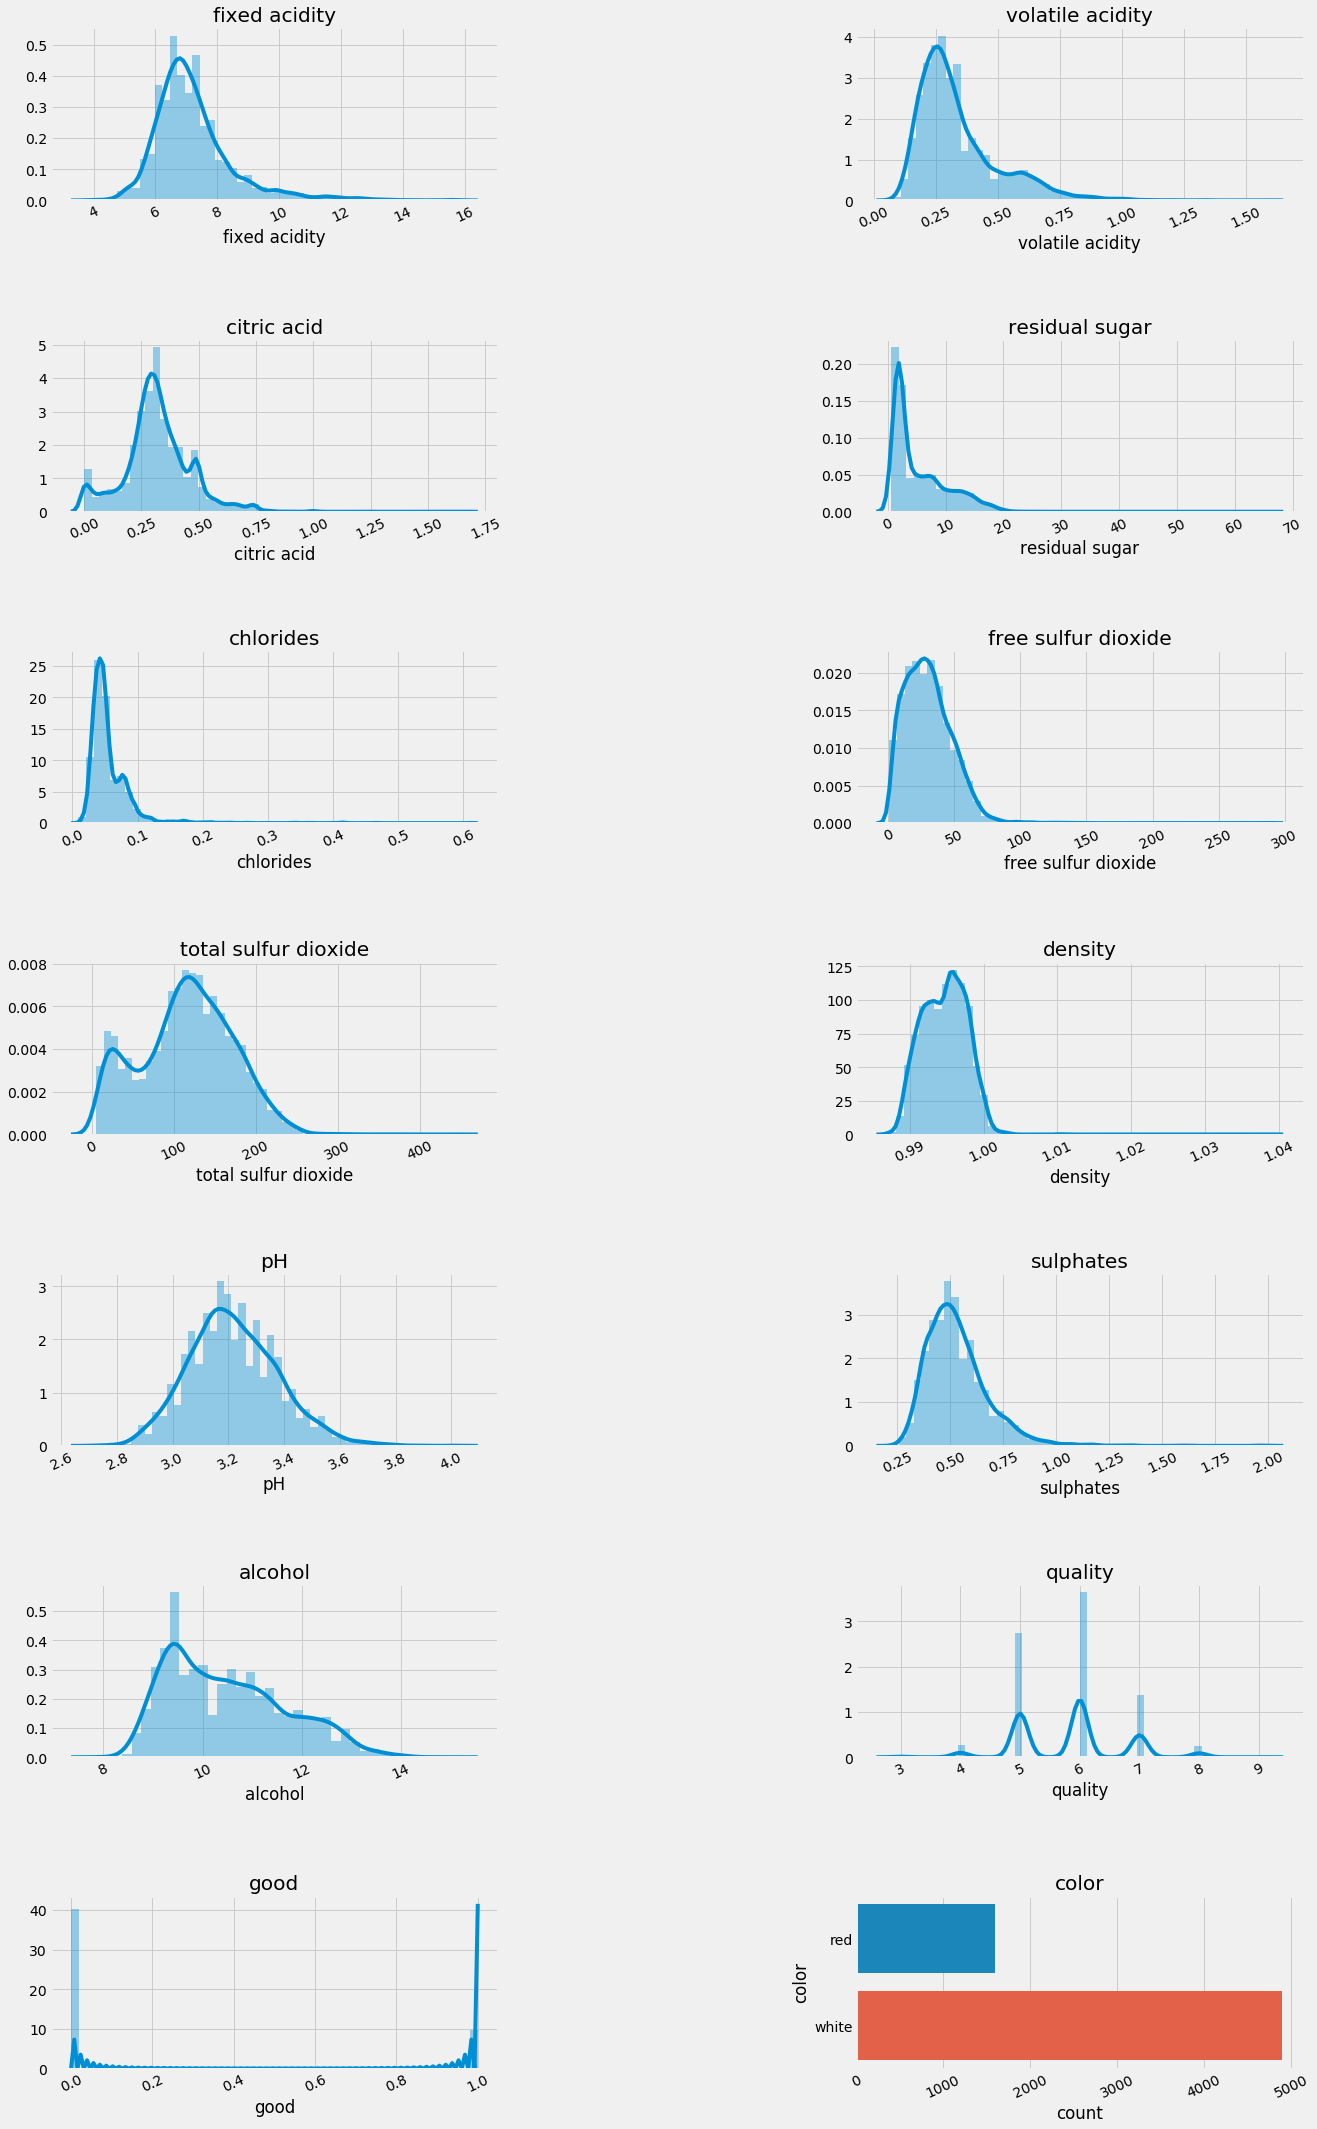

In [19]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            #plt.show()
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
            #plt.show()
plot_distribution(df, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

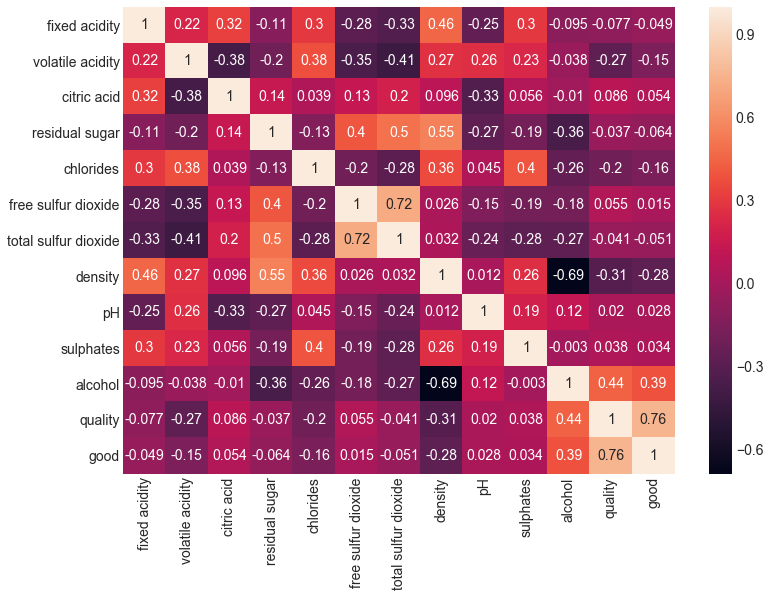

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(),annot=True)

#### Note from above heatmap it is evident that quality and good are the two features which are highly correlated.

In [33]:
#### Select the upper triangle of matrix
abs_corr = df.corr().abs()
up_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape),k=1).astype(np.bool))
correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.75)]
print('Correlated Features : ',correlated_features)

Correlated Features :  ['good']


In [35]:
#### Drop Corelated Features
col_list = ['color'] + correlated_features
col_list

['color', 'good']

In [37]:
df1 = df.drop(correlated_features,axis=1)
df1['color'] = df['color'].map({'red':0,'white':1})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


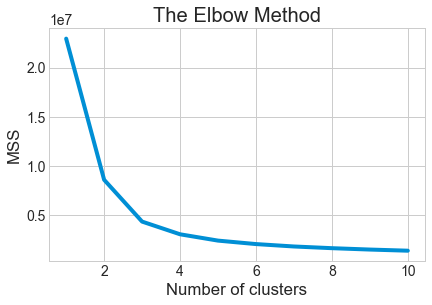

In [42]:
features = df1.drop('color',axis=1)
labels = df1['color']
mss = []
for i in range(10):
    i = i + 1
    kmeans = KMeans(n_clusters=i,random_state=1)
    kmeans.fit(features)
    mss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), mss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('MSS')
plt.show()

#### Note:
Optimum K value = 2 as seen from the elbow method.

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5197, 12) (1300, 12)
(5197,) (1300,)


In [67]:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)
label = kmeans.labels_
label

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 0])

In [56]:
np.unique(label)

array([0, 1])

In [68]:
len(labels),len(y_kmeans)

(6497, 6497)

In [69]:
from collections import Counter
Counter(labels)

Counter({0: 1599, 1: 4898})

In [70]:
Counter(y_kmeans)

Counter({0: 2826, 1: 3671})

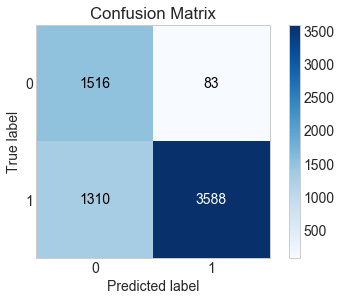

In [71]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(labels,y_kmeans)

In [66]:
print('accuracy_score : ',metrics.accuracy_score(y_test,y_kmeans))

accuracy_score :  0.212307692308


In [72]:
print('accuracy_score : ',metrics.accuracy_score(labels,label))

accuracy_score :  0.785593350777


In [73]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_test,y_test)
y_pred = LR.predict(X_test)
print('accuracy_score : ',metrics.accuracy_score(y_test,y_pred))

accuracy_score :  0.973076923077


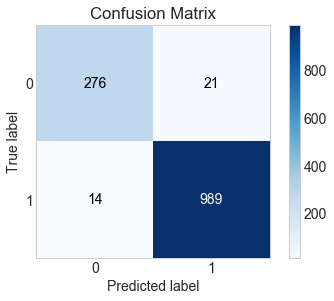

In [74]:
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)